In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import gym
gym.__version__
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display

In [2]:

def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
               dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)

    anim.save('movie_cartpole.mp4')  # 주석 추가 : 애니메이션을 저장하는 부분
    display(display_animation(anim, default_mode='loop'))

In [5]:
# 수레를 무작위로 움직임

frames = []
env = gym.make('CartPole-v0')
observation = env.reset()  # 먼저 환경을 초기화해야 함
for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))  # frames에 각 시각의 이미지를 추가한다
    action = np.random.choice(2)  # 0(수레를 왼쪽으로), 1(수레를 오른쪽으로) 두 가지 행동을 무작위로 취함
    observation, reward, done, info = env.step(action)  # action을 실행
# 주의: 실행했을 때 ipykernel_launcher.p... 라는 창이 나타날 수 있지만, 무시하면 된다
env.close()

/Users/nibey/miniconda3/envs/drl/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


MovieWriter stderr:
dyld: Library not loaded: @rpath/libopenh264.5.dylib
  Referenced from: /Users/nibey/miniconda3/envs/drl/lib/libavcodec.58.dylib
  Reason: image not found



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x400', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'movie_cartpole.mp4']' died with <Signals.SIGABRT: 6>.

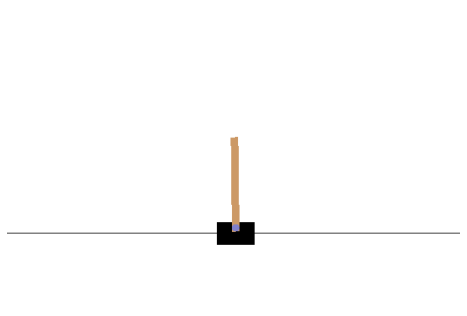

In [4]:
display_frames_as_gif(frames)